## Title: Project 7: Apply Supervised Machine Learning - Simple Linear Regression
### Author: Tesfamariam
### Link: https://github.com/Tesfamariam100/datafun-07-applied


### dependancies


In [110]:
import matplotlib
from matplotlib import pyplot as plt
import pandas
import pyarrow
import scipy
from scipy import stats
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np

### Part 1 - Chart a Straight Line

#### Linear Relationships

Linear relationships exist between Fahrenheit and Celsius temperatures, where Celsius (dependent variable) is determined by Fahrenheit (independent variable) through the formula c = 5/9 ×(f−32). Plotting Fahrenheit against Celsius yields a straight line, demonstrated by computing Celsius equivalents for Fahrenheit temperatures 0–100 in 10-degree intervals and storing them as tuples in 'temps'

#### Visualizing Fahrenheit and Celsius Temperature Relationships

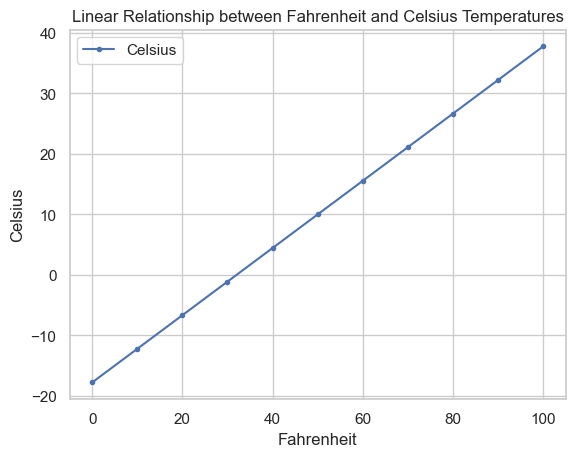

In [111]:
c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]
[(f, c(f)) for f in range(0, 101, 10)]

#place the data in a DataFrame
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')
plt.title('Linear Relationship between Fahrenheit and Celsius Temperatures')

# Add a grid
plt.grid(True)

## (Part 2) - Predict Avg High Temp in NYC in January 

### Section 1 - Data Acquisition

In [112]:
#loading and displaying the New York City data from ave_hi_nyc_jan_1895-2018.csv
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


### Section 2 - Data Inspection

Examine the DataFrame’s head and tail to understand the data:

In [113]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [114]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

Seaborn will graph Date-Value pairs and a regression line, automatically labeling axes using DataFrame column names. To enhance readability, we'll change the name of the 'Value' column to 'Temperature'.

In [115]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


### Section 2 - Data Inspection

Seaborn labels x-axis tick marks with Date values. To improve readability for January temperatures, we'll remove "01" from each Date.

In [116]:
nyc.Date.dtype

dtype('int64')

checking the column type ('int64') which is integer, dividing by 100 removes the last two digits.

In [117]:
# Using the Series method floordiv applies integer division to each element within the Series:

nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)


,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

To obtain quick statistics regarding the dataset's temperatures, use the `describe` function on the 'Temperature' column. 

In [118]:
### Calculating Basic Descriptive Statistics

# Set precision to 2 decimal places
pd.set_option('display.precision', 2)

# Calculate basic descriptive statistics using describe
nyc['Temperature'].describe()


count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

Use the SciPy stats module's linregress function to calculate the slope and intercept for the best fit line through the data.



In [119]:
# Calculate the slope and intercept of the regression line
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)
# Obtain the slope of the linear regression
linear_regression.slope

0.014771361132966163

In [120]:
# Linear Regression Intercept
linear_regression.intercept

8.694993233674289

### Section 6 - Predict

Utilize your model to predict the "average high temperature in January" for the year 2024, similar to the process done for 2019.


In [121]:
# Predict the average high temperature in January for the year 2024 using the linear regression model
linear_regression.slope * year_2024 + linear_regression.intercept
predicted_temperature_2024

38.5922281667978

In [122]:
# We also can approximate what the average temperature might have been in the years before 1895.

linear_regression.slope * 1890 + linear_regression.intercept


36.612865774980335

In [123]:
# We should expect predictions become less reliable as you move further beyond this range.

### Section 7 - Visualizations

Plotting Average High Temperatures and Regression Line:
Using Seaborn regplot function we'll visualize data points with dates on the x-axis and temperatures on the y-axis. Blue dots represent temperatures for dates, while a straight regression line runs through the points.


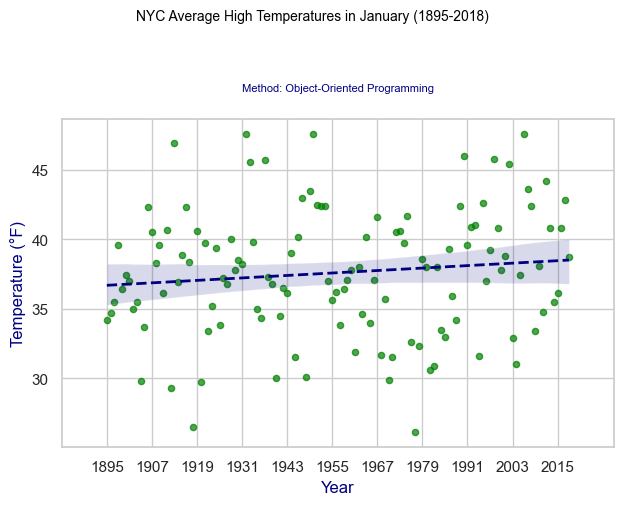

In [124]:

# Set Seaborn theme and customize scatter plot and regression line
sns.set_theme(style='whitegrid')

# Create the scatter plot with regplot
axes = sns.regplot(x='Date', y='Temperature', data=nyc,
                   scatter_kws={"color": "green", "alpha": 0.7, "s": 20, "marker": "o"},
                   line_kws={"color": "navy", "lw": 2, "ls": "--"})

# Add title, subtitle, and labels to the plot
plt.suptitle('NYC Average High Temperatures in January (1895-2018)', fontsize=10, color='Black', y=1.05)
axes.set_title('Method: Object-Oriented Programming', fontsize=8, color='navy', pad=20)
axes.set_xlabel('Year', fontsize=12, color='navy')
axes.set_ylabel('Temperature (°F)', fontsize=12, color='navy')

# Customize ticks and extend the chart horizontally
axes.set_xticks(range(min(nyc.Date), max(nyc.Date), 12)) 
axes.set_xlim(min(nyc.Date) - 12, max(nyc.Date) + 12)

# Display the plot
plt.tight_layout()
plt.show()


**Analysis:**
NYC January High Temperature Trends (1895-2018)

The plot illustrates a generally increasing trend in average high temperatures in January for NYC from 1895 to 2018, with some fluctuations observed over the years.

## Part 3 - Predict Avg High Temp in NYC in January

### Section 1 - Build the Model

Let’s split the data into training and testing sets.

In [125]:
from sklearn.model_selection import train_test_split
In [7]: X_train, X_test, y_train, y_test = train_test_split(
nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
random_state=11)

To validate the 75%–25% train-test split, we can verify the shapes of X_train and X_test.

In [126]:
X_train.shape

(93, 1)

In [127]:
X_test.shape

(31, 1)

Let's train a LinearRegression estimator

In [128]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train),

(LinearRegression(),)

#### Linear Regression Estimation

After training the estimator, use the `fit` method to get its string representation.

The `LinearRegression` estimator iteratively adjusts slope and intercept values to minimize the sum of squares of data points' distances from the lion.

Access the estimator's `coef_` for slope (m) and `intercept_` for intercept (b) in the y = mx + b calculation.


In [129]:
linear_regression.coef_

array([0.01939167])

In [130]:
linear_regression.intercept_

-0.30779820252656975

### Section 2 - Test the Model

Utilize the data in X_test to test the model. Display predicted and expected values for every fifth element in the dataset to assess predictions.


In [131]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

Utilize the coefficient and intercept values to predict the January 2019 average high temperature and estimate the average high temperature in January 1890. The lambda function below implements the equation for a line y = mx + b, with coef_ as m and intercept_ as b.


In [132]:
predict = (lambda x: linear_regression.coef_ * x +
    linear_regression.intercept_)
predict(2024)

array([38.94094855])

### Section 4 - Visualizations


Create a scatter plot of the dataset using Seaborn's scatterplot function with the nyc DataFrame

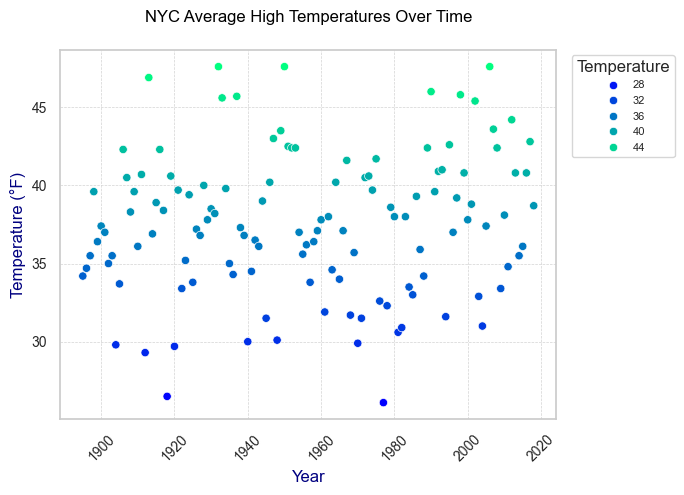

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot with custom elements
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter')

# Set title and labels
plt.title('NYC Average High Temperatures Over Time', fontsize=12, color='Black', pad=20)
plt.xlabel('Year', fontsize=12, color='navy')
plt.ylabel('Temperature (°F)', fontsize=12, color='navy')

# Add gridlines
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Customize ticks
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Show legend with adjusted parameters
plt.legend(title='Temperature', loc='upper right', fontsize=8, bbox_to_anchor=(1.25, 1))

# Show plot
plt.show()
